## Instalar a biblioteca do `tidyverse`

Se a biblioteca `tidyverse` e `e1071` não estiverem instaladas, pode ser instalada pelo repositório do CRAN (isto deve ser feito fora do `jupyter`):

```
install.packages("tidyverse")
install.packages("e1071")
```

### Importar a biblioteca do `tidyverse` e do `e1071`

In [1]:
library(tidyverse)
library(e1071)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.2     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### Importando os dados

In [2]:
# Import data
data_mat <- read_csv2('../dados/student-mat.csv',
                 col_types = cols(.default = col_character()))
data_port <- read_csv2('../dados/student-por.csv',
                 col_types = cols(.default = col_character()))

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.



### Conferindo o número de amostras

In [3]:
# Number os samples
nrow(data_port)
nrow(data_mat)

[1] 649

[1] 395

---
### Verificando os dados

In [4]:
# Show dataset
head(data_port)
head(data_mat)

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,4,0,11,11
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,2,9,11,11
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,6,12,13,12
GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,0,14,14,14
GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,0,11,13,13
GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,6,12,12,13


school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15


---
### Boxplots

#### Português

Parsed with column specification:
cols(
  .default = col_character(),
  age = col_double(),
  Medu = col_double(),
  Fedu = col_double(),
  traveltime = col_double(),
  studytime = col_double(),
  failures = col_double(),
  famrel = col_double(),
  freetime = col_double(),
  goout = col_double(),
  Dalc = col_double(),
  Walc = col_double(),
  health = col_double(),
  absences = col_double(),
  G1 = col_double(),
  G2 = col_double(),
  G3 = col_double()
)

See spec(...) for full column specifications.

Saving 6.67 x 6.67 in image



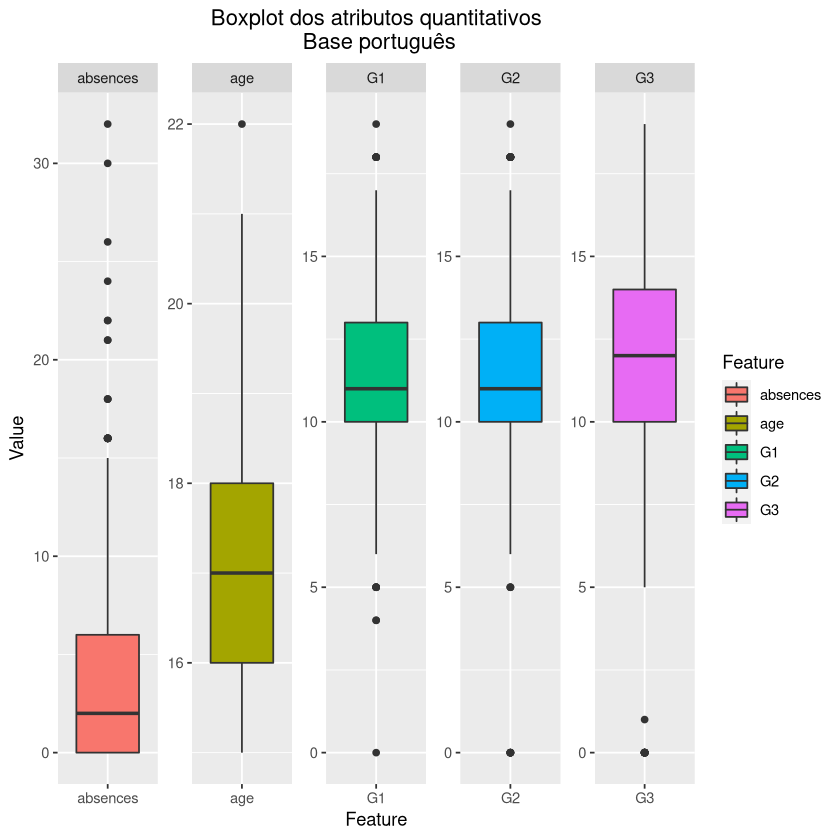

In [5]:
data_port %>%
    type_convert() %>%
    select(G1, G2, G3, age, absences) %>%
    pivot_longer(everything(), names_to = "Feature", values_to = "Value") %>%
        ggplot(aes(Value, x = Feature, fill = Feature)) +
               geom_boxplot() +
               ggtitle("Boxplot dos atributos quantitativos\n Base português") +
               theme(plot.title = element_text(hjust = 0.5)) +
               facet_wrap(vars(Feature), scales = "free", ncol=5)
ggsave("../plots/boxplot-port.png")

#### Matemática

Parsed with column specification:
cols(
  .default = col_character(),
  age = col_double(),
  Medu = col_double(),
  Fedu = col_double(),
  traveltime = col_double(),
  studytime = col_double(),
  failures = col_double(),
  famrel = col_double(),
  freetime = col_double(),
  goout = col_double(),
  Dalc = col_double(),
  Walc = col_double(),
  health = col_double(),
  absences = col_double(),
  G1 = col_double(),
  G2 = col_double(),
  G3 = col_double()
)

See spec(...) for full column specifications.

Saving 6.67 x 6.67 in image



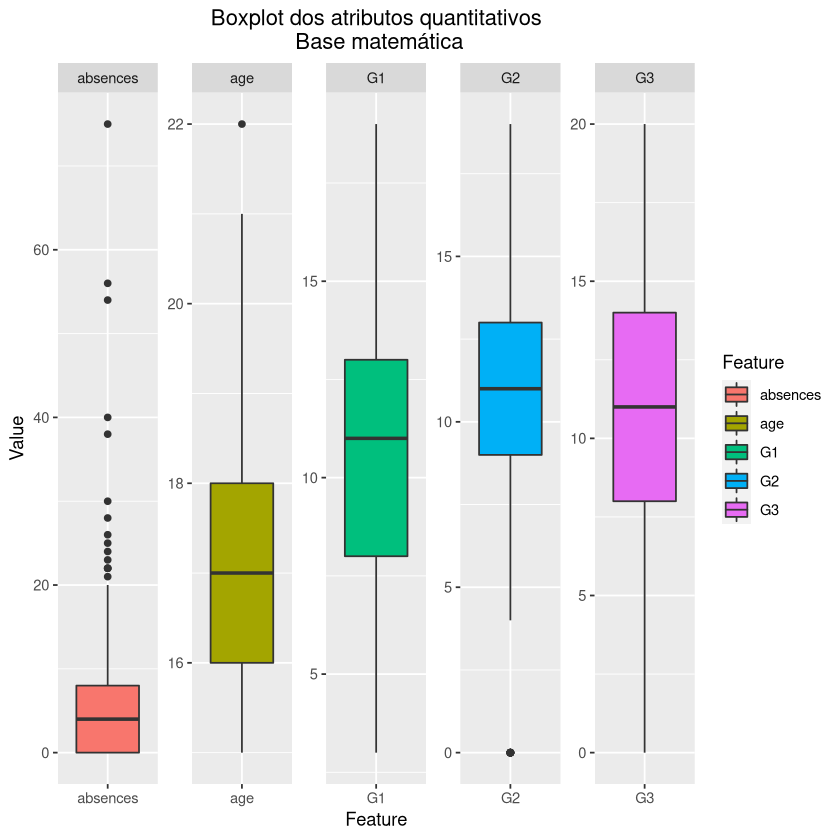

In [6]:
data_mat %>%
    type_convert() %>%
    select(G1, G2, G3, age, absences) %>%
    pivot_longer(everything(), names_to = "Feature", values_to = "Value") %>%
        ggplot(aes(Value, x = Feature, fill = Feature)) +
               geom_boxplot() + 
               ggtitle("Boxplot dos atributos quantitativos\n Base matemática") +
               theme(plot.title = element_text(hjust = 0.5)) + 
               facet_wrap(vars(Feature), scales = "free", ncol=5)
ggsave("../plots/boxplot-mat.png")